In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from utils import get_label
sns.set_theme(style="whitegrid")

In [3]:
symps = pd.read_csv('result_class/bias_symptoms.csv')

In [4]:
high_sp = symps[symps['statistical_parity'] == 1]

In [5]:
high_corr_sp = high_sp['mutual_info'].values

In [6]:
corr_high_sp = symps[symps["statistical_parity"] == 1]["mutual_info"].values
corr_low_sp = symps[symps["statistical_parity"] == 0]["mutual_info"].values

In [7]:
corr_high_eo = symps[symps["equal_opportunity"] == 1]["mutual_info"].values
corr_low_eo = symps[symps["equal_opportunity"] == 0]["mutual_info"].values

In [8]:
corr_high_ao = symps[symps["average_odds"] == 1]["mutual_info"].values
corr_low_ao = symps[symps["average_odds"] == 0]["mutual_info"].values

In [9]:
df = pd.DataFrame({
  'Correlation': [corr_high_sp, corr_low_sp, corr_high_eo, corr_low_eo, corr_high_ao, corr_low_ao],
  'Metric': ['Statistical Parity', 'Statistical Parity', 'Equal Opportunity', 'Equal Opportunity', 'Average Odds', 'Average Odds'],
  'Bias': ['High', 'Low', 'High', 'Low', 'High', 'Low']
})

In [10]:
df = df.explode('Correlation')

c:\Users\giord\miniconda3\envs\bias\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


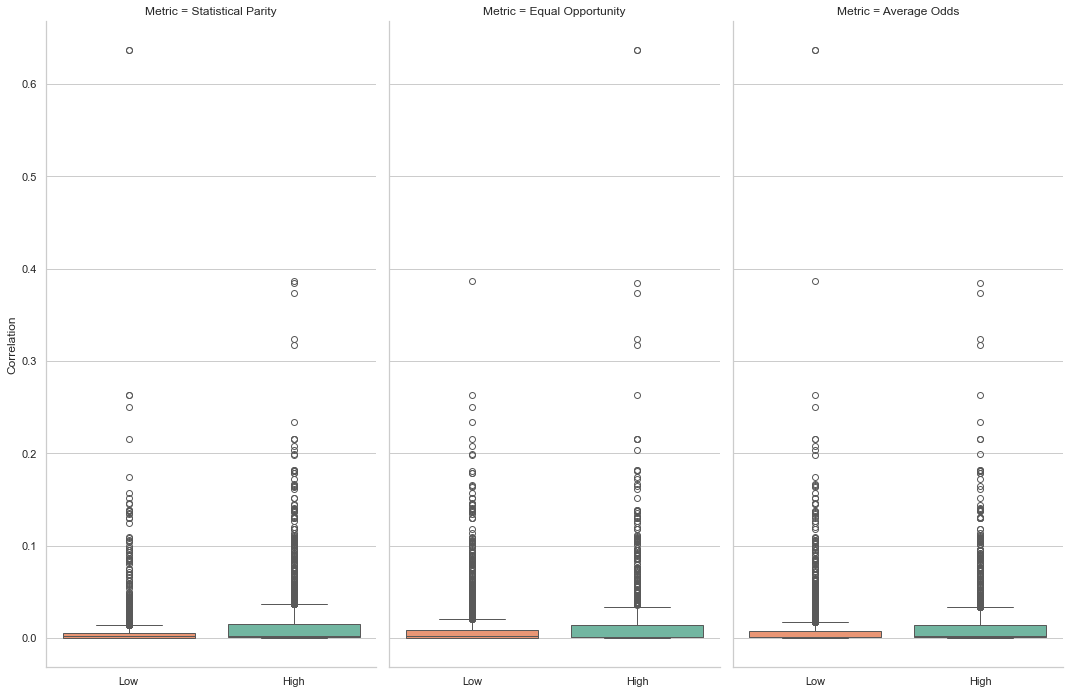

In [11]:
g = sns.FacetGrid(df, col="Metric", height=10, aspect=.5)
g.map(sns.boxplot, "Bias", "Correlation", 'Bias', order=['Low', 'High'], palette="Set2")
g.add_legend()
g.set_axis_labels("", "Correlation")
plt.show()